<a href="https://colab.research.google.com/github/HHafida/OC_P8_Participez-une-comp-tition-Kaggle-/blob/main/IML_P8_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import des librairies dont nous aurons besoin

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  RobustScaler ,MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split,cross_validate
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error , confusion_matrix,accuracy_score ,r2_score
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import time
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importation du fichier test

df ='/content/drive/MyDrive/df_test.csv'
test = pd.read_csv(df)

# Importation du fichier test

df ='/content/drive/MyDrive/df_train.csv'
train = pd.read_csv(df)

In [ ]:
def generate_dataframe_report(df):
    # Afficher les premières lignes du DataFrame
    display(df.head())
    print("---------------------------------------------")

    # Afficher la forme du DataFrame (nombre de lignes, nombre de colonnes)
    display(df.shape)
    print("---------------------------------------------")

    # Afficher les types de données des colonnes
    display(df.dtypes)
    print("---------------------------------------------")

    # Afficher un résumé statistique du DataFrame
    display(df.describe())
    print("---------------------------------------------")


In [ ]:
generate_dataframe_report(train)

,Id,Age,RenovationAge,TotalBathrooms,OverallQuality,HasPool,TotalOutdoorArea,TotalGarageFeatures,TotalGardenFeatures,SalePrice_log,TotalArea_log
0,1,5,5,2.5,35,0,61,550,0,12.064515,7.711101
1,2,31,31,2.0,48,0,298,462,0,11.895470,7.692113
2,3,7,6,2.5,35,0,42,610,0,12.147389,7.771910
3,4,91,36,1.0,35,0,307,645,0,11.562677,7.668561
4,5,8,8,2.5,40,0,276,839,0,12.278863,8.009695


---------------------------------------------


(1460, 11)

---------------------------------------------


Id                       int64
Age                      int64
RenovationAge            int64
TotalBathrooms         float64
OverallQuality           int64
HasPool                  int64
TotalOutdoorArea         int64
TotalGarageFeatures      int64
TotalGardenFeatures      int64
SalePrice_log          float64
TotalArea_log          float64
dtype: object

---------------------------------------------


,Id,Age,RenovationAge,TotalBathrooms,OverallQuality,HasPool,TotalOutdoorArea,TotalGarageFeatures,TotalGardenFeatures,SalePrice_log,TotalArea_log
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,36.547945,22.950000,1.756507,33.864384,0.004795,181.329452,474.747260,18.470548,11.749026,7.642840
std,421.610009,30.250152,20.640653,0.636015,9.219624,0.069100,156.656097,214.464617,62.174122,0.631042,0.417023
min,1.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,8.000000,4.000000,1.000000,30.000000,0.000000,45.000000,335.500000,0.000000,11.462432,7.424463
50%,730.500000,35.000000,14.000000,2.000000,35.000000,0.000000,164.000000,482.000000,0.000000,11.760574,7.669028
75%,1095.250000,54.000000,41.000000,2.500000,40.000000,0.000000,266.000000,578.000000,0.000000,12.095705,7.890208
max,1460.000000,136.000000,60.000000,3.500000,90.000000,1.000000,1027.000000,1420.000000,508.000000,13.487147,9.343034


---------------------------------------------


In [ ]:
train = train.drop('Id', axis=1)


In [ ]:
generate_dataframe_report(test)

,Id,Age,RenovationAge,TotalBathrooms,OverallQuality,HasPool,TotalOutdoorArea,TotalGarageFeatures,TotalGardenFeatures,TotalArea_log
0,1461,49,49,1.0,30,0,260,731.0,120,7.062192
1,1462,52,52,1.5,36,0,429,313.0,0,7.624131
2,1463,13,12,2.5,25,0,246,484.0,0,7.573531
3,1464,12,12,2.5,36,0,396,472.0,0,7.559559
4,1465,18,18,2.0,40,0,226,508.0,144,7.575072


---------------------------------------------


(1459, 10)

---------------------------------------------


Id                       int64
Age                      int64
RenovationAge            int64
TotalBathrooms         float64
OverallQuality           int64
HasPool                  int64
TotalOutdoorArea         int64
TotalGarageFeatures    float64
TotalGardenFeatures      int64
TotalArea_log          float64
dtype: object

---------------------------------------------


,Id,Age,RenovationAge,TotalBathrooms,OverallQuality,HasPool,TotalOutdoorArea,TotalGarageFeatures,TotalGardenFeatures,TotalArea_log
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,36.411926,24.106923,1.759767,33.607265,0.004112,184.590816,474.209733,18.858807,7.461075
std,421.321334,30.432248,21.131883,0.649495,9.153993,0.064018,163.357084,218.024208,59.596476,0.513960
min,1461.000000,-1.000000,-2.000000,0.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1825.500000,7.000000,4.000000,1.000000,30.000000,0.000000,51.000000,318.500000,0.000000,7.225481
50%,2190.000000,34.000000,16.000000,2.000000,35.000000,0.000000,166.000000,481.000000,0.000000,7.504942
75%,2554.500000,55.000000,44.000000,2.000000,40.000000,0.000000,268.000000,578.000000,0.000000,7.768533
max,2919.000000,129.000000,60.000000,5.000000,72.000000,1.000000,1424.000000,1492.000000,576.000000,9.167328


---------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate

# Select the numerical features and target variable
numerical_features = ['Age', 'RenovationAge', 'TotalBathrooms', 'OverallQuality', 'HasPool',
                      'TotalOutdoorArea', 'TotalGarageFeatures', 'TotalGardenFeatures']
target = 'SalePrice_log'

# Separate the features and target variable
X = train[numerical_features]
y = train[target]

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a baseline model using Dummy Regressor
dummy_regr = DummyRegressor(strategy='mean')

# Perform cross-validation with 5 folds
cv_scores = np.sqrt(-cross_val_score(dummy_regr, X_scaled, y, cv=5, scoring='neg_mean_squared_error'))

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Fit the model on the entire training set
dummy_regr.fit(X_scaled, y)

# Predict on the training set
y_pred_train = dummy_regr.predict(X_scaled)

# Calculate the RMSE on the training set
rmse_train = np.sqrt(mean_squared_error(y, y_pred_train))

# Print the results
print(f"Baseline Model (Dummy Regressor)")
print(f"Mean CV RMSE: {mean_cv_score:.4f}")
print(f"Std CV RMSE: {std_cv_score:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")

# Perform evaluation on the training set
scoring = {'RMSE': make_scorer(mean_squared_error, squared=False)}
scores = cross_validate(dummy_regr, X_scaled, y, cv=5, scoring=scoring)

# Print the RMSE scores on the training set
print(f"\nEvaluation on the training set")
for i in range(5):
    print(f"Fold {i+1}: {scores['test_RMSE'][i]:.4f}")
print(f"Average RMSE: {np.mean(scores['test_RMSE']):.4f}")



Baseline Model (Dummy Regressor)
Mean CV RMSE: 0.6151
Std CV RMSE: 0.1418
Train RMSE: 0.6308

Evaluation on the training set
Fold 1: 0.5205
Fold 2: 0.8889
Fold 3: 0.5372
Fold 4: 0.6165
Fold 5: 0.5125
Average RMSE: 0.6151


In [ ]:
X = train.drop('SalePrice_log', axis=1)
y = train['SalePrice_log']

# Define the models
models = {
    'Dummy': {'estimator': DummyRegressor(), 'params': {}},
    'Ridge': {'estimator': Ridge(), 'params': {}},
    'Lasso': {'estimator': Lasso(), 'params': {}},
    'ElasticNet': {'estimator': ElasticNet(), 'params': {}}
}

# Define the scoring metric
scoring = {'RMSE': make_scorer(mean_squared_error, squared=False)}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_RMSE', 'Val_RMSE', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=5, scoring=scoring, refit='RMSE', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X, y)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_RMSE': grid_search.cv_results_['mean_train_RMSE'][grid_search.best_index_],
                              'Val_RMSE': grid_search.cv_results_['mean_test_RMSE'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation RMSE and fitting time
results = results.sort_values(by=['Val_RMSE', 'Fit_time'])

# Print the results
results


,Model,Params,Train_RMSE,Val_RMSE,Fit_time
1,Ridge,{},0.370902,0.342137,0.118414
3,ElasticNet,{},0.424046,0.400980,0.209106
2,Lasso,{},0.437029,0.414787,0.273628
0,Dummy,{},0.629403,0.615121,0.053417


In [ ]:
from sklearn.model_selection import GridSearchCV

X = train.drop('SalePrice_log', axis=1)
y = train['SalePrice_log']

# Define the models with their respective hyperparameter grids
models = {
    'Dummy': {'estimator': DummyRegressor(), 'params': {}},
    'Ridge': {'estimator': Ridge(), 'params': {'alpha': [0.1, 1.0, 10.0]}},
    'Lasso': {'estimator': Lasso(), 'params': {'alpha': [0.1, 1.0, 10.0]}},
    'ElasticNet': {'estimator': ElasticNet(), 'params': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}}
}

# Define the scoring metric
scoring = {'RMSE': make_scorer(mean_squared_error, squared=False)}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_RMSE', 'Val_RMSE', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=5, scoring=scoring, refit='RMSE', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X, y)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_RMSE': grid_search.cv_results_['mean_train_RMSE'][grid_search.best_index_],
                              'Val_RMSE': grid_search.cv_results_['mean_test_RMSE'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation RMSE and fitting time
results = results.sort_values(by=['Val_RMSE', 'Fit_time'])

# Print the results
results


,Model,Params,Train_RMSE,Val_RMSE,Fit_time
1,Ridge,{'alpha': 0.1},0.370895,0.342448,0.278642
3,ElasticNet,"{'alpha': 10.0, 'l1_ratio': 0.8}",0.510465,0.494750,1.752027
2,Lasso,{'alpha': 10.0},0.512257,0.496895,0.514678
0,Dummy,{},0.629403,0.615121,0.049566


In [ ]:
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import time

X = train.drop('SalePrice_log', axis=1)
y = train['SalePrice_log']

# Define the models
models = {
    'SVR': {'estimator': SVR(), 'params': {}},
    'KernelRidge': {'estimator': KernelRidge(), 'params': {}}
}

# Define the scoring metric
scoring = {'RMSE': make_scorer(mean_squared_error, squared=False)}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_RMSE', 'Val_RMSE', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=5, scoring=scoring, refit='RMSE', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X, y)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_RMSE': grid_search.cv_results_['mean_train_RMSE'][grid_search.best_index_],
                              'Val_RMSE': grid_search.cv_results_['mean_test_RMSE'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation RMSE and fitting time
results = results.sort_values(by=['Val_RMSE', 'Fit_time'])

# Print the results
results


,Model,Params,Train_RMSE,Val_RMSE,Fit_time
0,SVR,{},0.448252,0.436519,1.034293
1,KernelRidge,{},0.481294,0.450448,0.430688


In [ ]:
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import time

X = train.drop('SalePrice_log', axis=1)
y = train['SalePrice_log']

# Define the models with their respective hyperparameter grids
models = {
    'SVR': {'estimator': SVR(), 'params': {'C': [0.1, 1.0, 10.0], 'gamma': [0.1, 1.0, 10.0]}},
    'KernelRidge': {'estimator': KernelRidge(), 'params': {'alpha': [0.1, 1.0, 10.0], 'gamma': [0.1, 1.0, 10.0]}}
}

# Define the scoring metric
scoring = {'RMSE': make_scorer(mean_squared_error, squared=False)}

# Initialize the DataFrame to store the scores
results = pd.DataFrame(columns=['Model', 'Params', 'Train_RMSE', 'Val_RMSE', 'Fit_time'])

for name, model in models.items():
    # Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
    grid_search = GridSearchCV(model['estimator'], model['params'], cv=5, scoring=scoring, refit='RMSE', return_train_score=True)
    # Train the GridSearchCV and measure the training time
    start_time = time.time()
    grid_search.fit(X, y)
    end_time = time.time()
    fit_time = end_time - start_time
    # Store the scores and hyperparameters in the DataFrame
    results = results.append({'Model': name, 'Params': grid_search.best_params_,
                              'Train_RMSE': grid_search.cv_results_['mean_train_RMSE'][grid_search.best_index_],
                              'Val_RMSE': grid_search.cv_results_['mean_test_RMSE'][grid_search.best_index_],
                              'Fit_time': fit_time}, ignore_index=True)

# Sort the results by validation RMSE and fitting time
results = results.sort_values(by=['Val_RMSE', 'Fit_time'])

# Print the results
results


,Model,Params,Train_RMSE,Val_RMSE,Fit_time
1,KernelRidge,"{'alpha': 10.0, 'gamma': 0.1}",0.481728,0.451089,2.601053
0,SVR,"{'C': 1.0, 'gamma': 0.1}",0.344585,0.615196,12.205376


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import time

X = train.drop('SalePrice_log', axis=1)
y = train['SalePrice_log']

# Random Forest model with hyperparameter grid
rf_model = RandomForestRegressor()
rf_param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, scoring='r2', cv=5, return_train_score=True)
start_time = time.time()
rf_grid_search.fit(X, y)
end_time = time.time()
rf_fit_time = end_time - start_time
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X)
rf_r2_score_train = r2_score(y, rf_predictions)
rf_r2_score_val = rf_grid_search.best_score_

# XGBoost model with hyperparameter grid
xgb_model = xgb.XGBRegressor()
xgb_param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [3, 5, 7]}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, scoring='r2', cv=5, return_train_score=True)
start_time = time.time()
xgb_grid_search.fit(X, y)
end_time = time.time()
xgb_fit_time = end_time - start_time
xgb_best_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best_model.predict(X)
xgb_r2_score_train = r2_score(y, xgb_predictions)
xgb_r2_score_val = xgb_grid_search.best_score_

# Create a DataFrame to store the scores and hyperparameters
results = pd.DataFrame(columns=['Model', 'Params', 'Train_RMSE', 'Val_RMSE', 'Fit_time'])

# Add Random Forest results to the DataFrame
results = results.append({'Model': 'Random Forest', 'Params': rf_grid_search.best_params_,
                          'Train_RMSE': rf_r2_score_train, 'Val_RMSE': rf_r2_score_val, 'Fit_time': rf_fit_time},
                         ignore_index=True)

# Add XGBoost results to the DataFrame
results = results.append({'Model': 'XGBoost', 'Params': xgb_grid_search.best_params_,
                          'Train_RMSE': xgb_r2_score_train, 'Val_RMSE': xgb_r2_score_val, 'Fit_time': xgb_fit_time},
                         ignore_index=True)

# Print the results DataFrame
results


,Model,Params,Train_RMSE,Val_RMSE,Fit_time
0,Random Forest,"{'max_depth': 10, 'n_estimators': 500}",0.936412,0.696761,52.923970
1,XGBoost,"{'max_depth': 5, 'n_estimators': 100}",0.993079,0.707670,12.340215


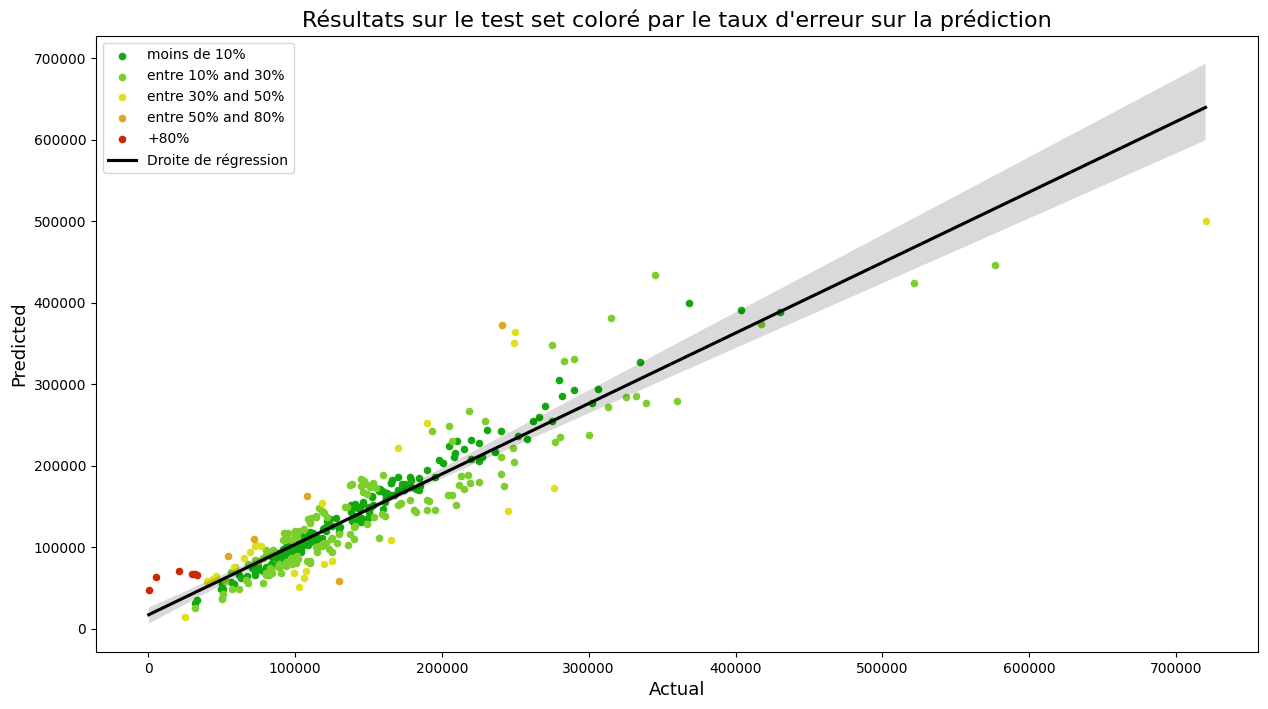

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# Define the XGBoost model with max_depth 5 and n_estimators 100
xgb_model = xgb.XGBRegressor(max_depth=5, n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Convert predictions and actual values to original scale (inverse log transformation)
y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)

# Calculate the percentage error
error = np.abs((y_pred - y_test) / y_test) * 100

# Create a DataFrame for storing the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error': error})

# Define the colors based on the error rate
def color_to_use(num):
    if num > 80:
        return "#cc2900"
    elif num > 50:
        return "#dfa61f"
    elif num > 30:
        return "#dddf1f"
    elif num > 10:
        return "#7cce2e"
    else:
        return "#13a90d"

results["color to use"] = results["Error"].apply(color_to_use)
results = results.sort_values(by="Error")

dict_lab = {"#cc2900": '+80%', '#dfa61f': "entre 50% and 80%",
            '#dddf1f': "entre 30% and 50%",
            '#7cce2e': "entre 10% and 30%",
            '#13a90d': "moins de 10%"}

# Plot the actual vs predicted values with color-coded error
plt.figure(figsize=(15, 8))
plt.title("Résultats sur le test set coloré par le taux d'erreur sur la prédiction", size=16)

for c in results["color to use"].unique():
    d = results.loc[results["color to use"] == c]
    plt.scatter(d["Actual"], d["Predicted"], color=c, label=dict_lab[c], s=20)

plt.xlabel('y_réel', size=13)
plt.ylabel('y_pred', size=13)

# Add the regression line
sns.regplot(x="Actual", y="Predicted", data=results, scatter=False, color='black', label='Droite de régression')

plt.legend()
plt.show()


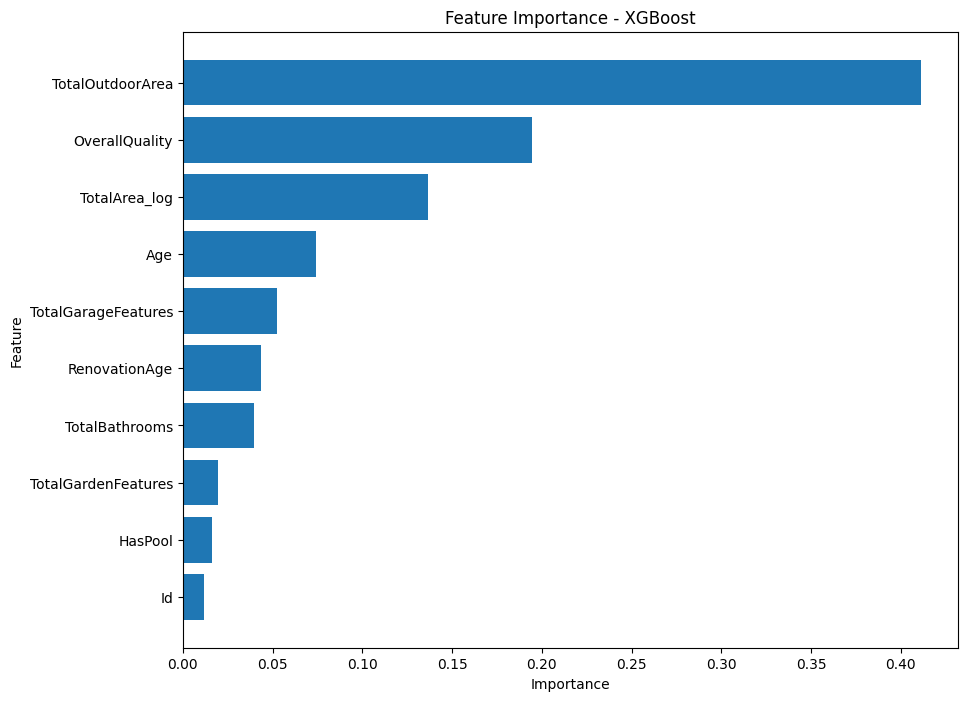

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# Define the XGBoost model with max_depth 5 and n_estimators 100
xgb_model = xgb.XGBRegressor(max_depth=5, n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Get the feature importances from the trained model
importances = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store the feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=True).reset_index(drop=True)

# Select the top 30 features with highest importance
importances_df_top = importances_df.head(30)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances_df_top['Feature'], importances_df_top['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - XGBoost')
plt.show()


In [ ]:
import xgboost as xgb

# Separate the features and target variable in the training data
X_train = train.drop('SalePrice_log', axis=1)
y_train = train['SalePrice_log']

# XGBoost model with selected hyperparameters
xgb_model = xgb.XGBRegressor(max_depth=5, n_estimators=100)
xgb_model.fit(X_train, y_train)


# Make predictions on the test data
y_pred = xgb_model.predict(test)

# Create the output DataFrame with 'Id' and 'SalePrice' columns
output = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred})

output.head()


,Id,SalePrice
0,1461,11.422921
1,1462,11.689876
2,1463,11.747937
3,1464,11.870954
4,1465,11.824861


In [ ]:
output.to_csv('/content/drive/MyDrive/output_competitionkaggle.csv', index=False)
